# ========= Breast Cancer =============

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
from sklearn import datasets

In [3]:
cancer = datasets.load_breast_cancer()

In [4]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
data = pd.DataFrame(data=cancer['data'], columns=cancer['feature_names'])
data['class'] = cancer['target']
data['class'] = data['class'].map({0:'malignant', 1:'benign'})

In [6]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


# Analyse Exploiratoire de Données

## Analyse de forme :

- Forme de données :
    - Nombre de lignes : **569**
    - Nombre de colonnes : **31**


- Types de variables :
    - Nombre de variables numeriques : **30**
    - Nombre de variables categorielles : **1**
 

- Valeurs manquantes : **0**

In [7]:
data.shape

(569, 31)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
data.dtypes.value_counts()

float64    30
object      1
dtype: int64

<AxesSubplot:>

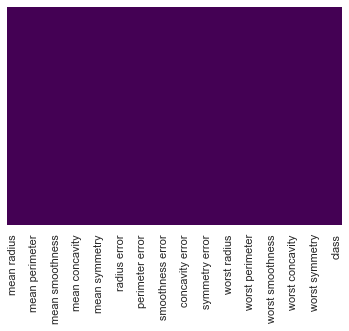

In [10]:
sns.heatmap(data.isna(), cbar=False, yticklabels=False, cmap='viridis')

## Analyse de fond :

### Visualisation de la Target :
- Classes desequilibrées

In [11]:
data['class'].unique()

array(['malignant', 'benign'], dtype=object)

In [12]:
data['class'].value_counts()

benign       357
malignant    212
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

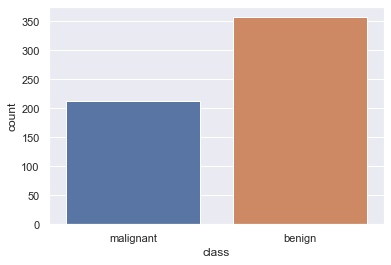

In [13]:
sns.countplot(data=data, x='class')

### Variables explicatives :
- Certaines variables sont fortement correlées.
    - Exemple : **'mean radius', 'mean perimeter', 'mean area'**

In [14]:
columns = list(data.select_dtypes('number').columns)

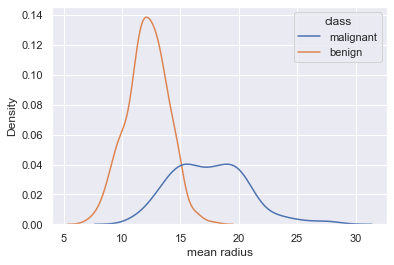

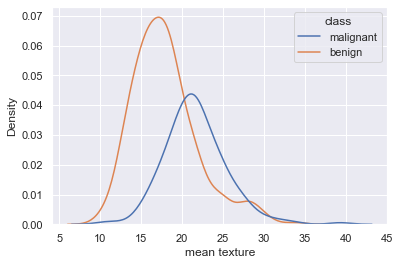

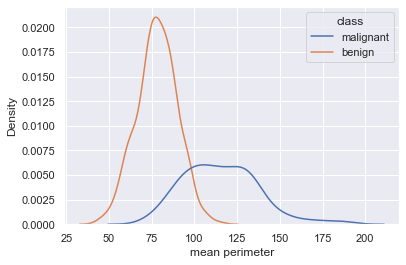

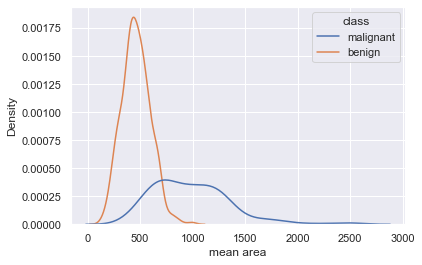

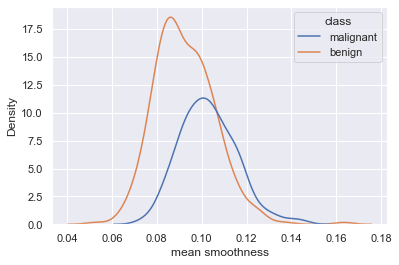

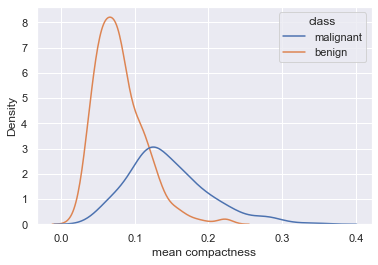

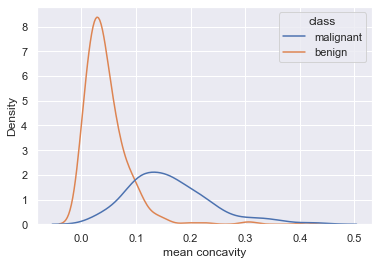

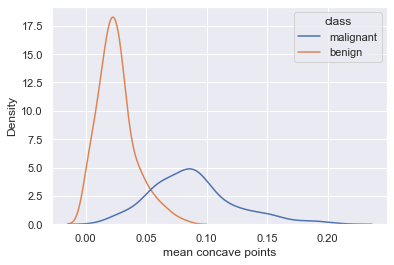

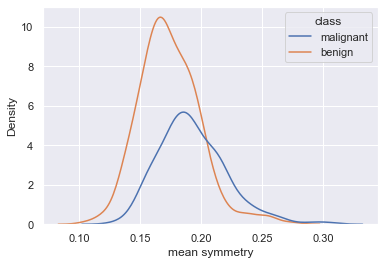

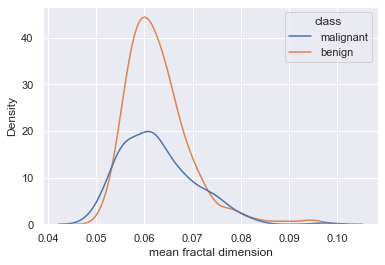

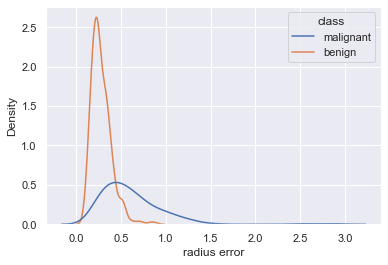

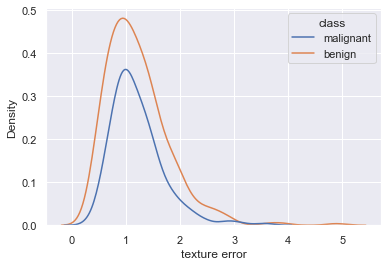

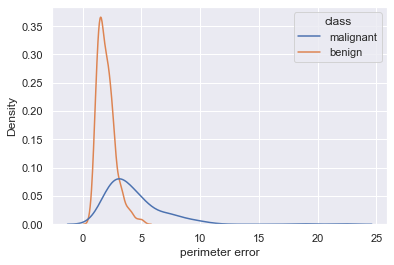

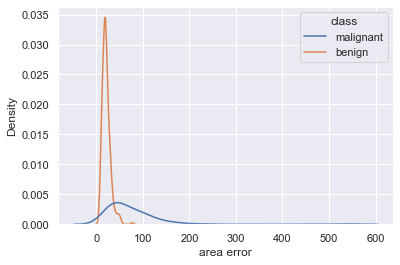

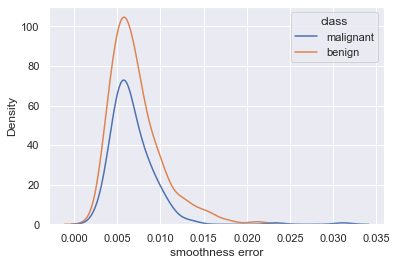

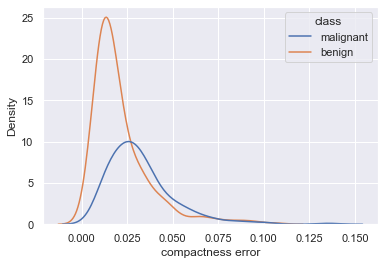

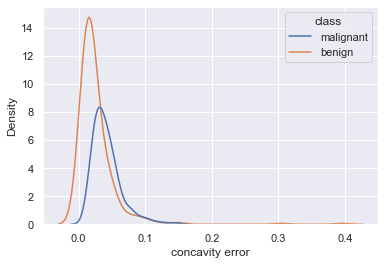

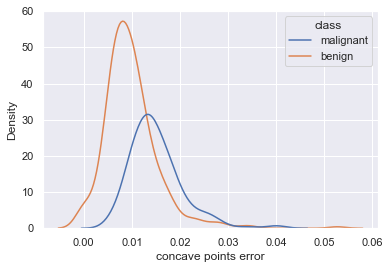

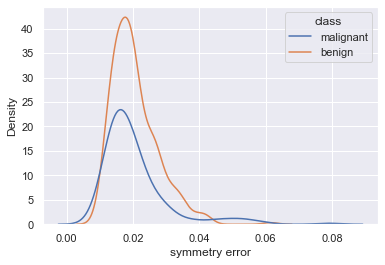

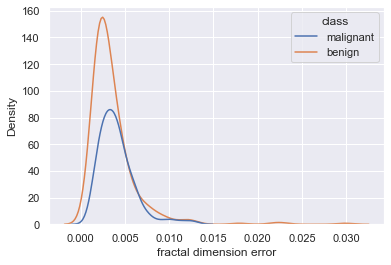

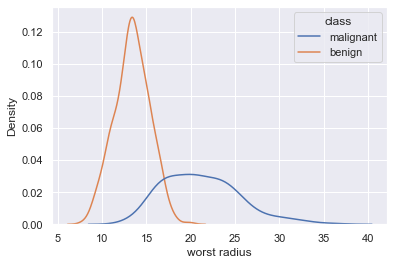

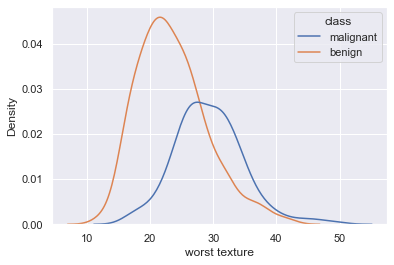

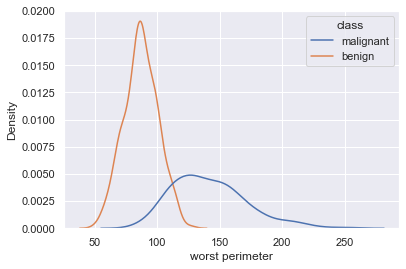

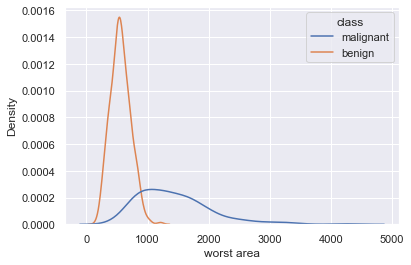

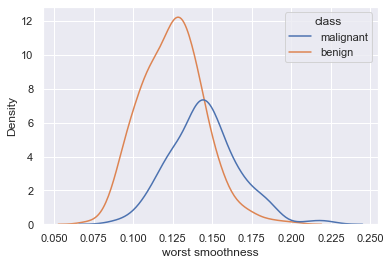

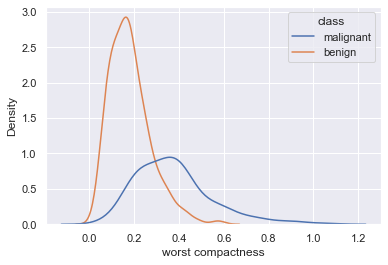

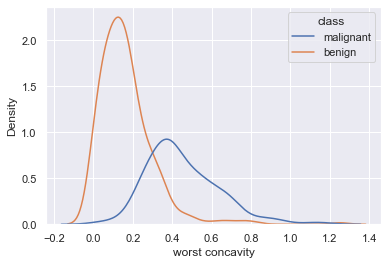

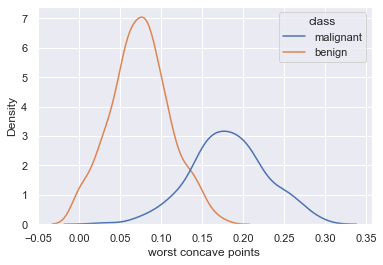

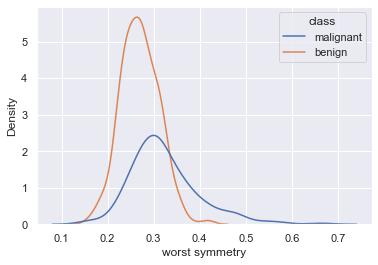

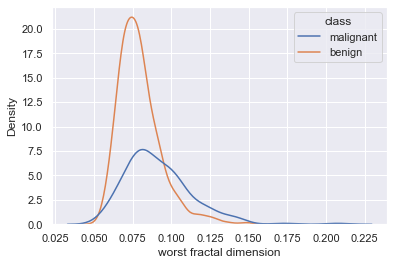

In [15]:
for col in columns:
    plt.figure()
    sns.kdeplot(data=data, x=col, hue='class')
    

<AxesSubplot:>

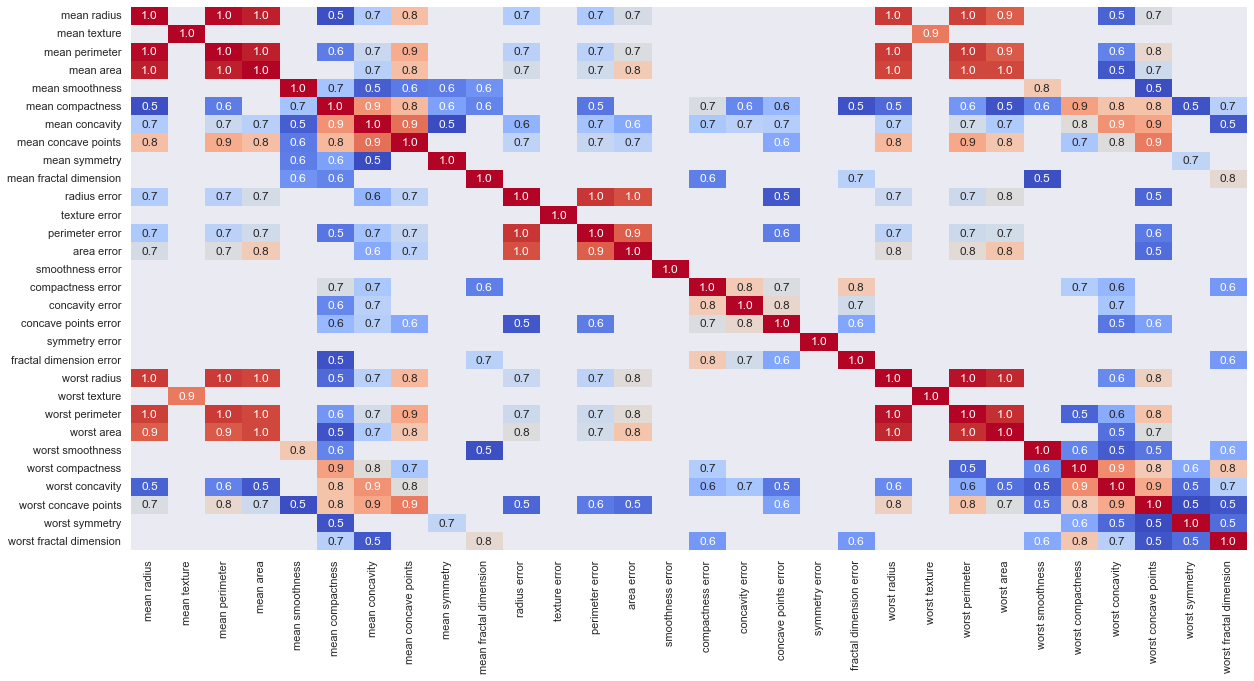

In [16]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr()[abs(data.corr()) > 0.5], cbar=False, annot=True, fmt='.1f', cmap='coolwarm')

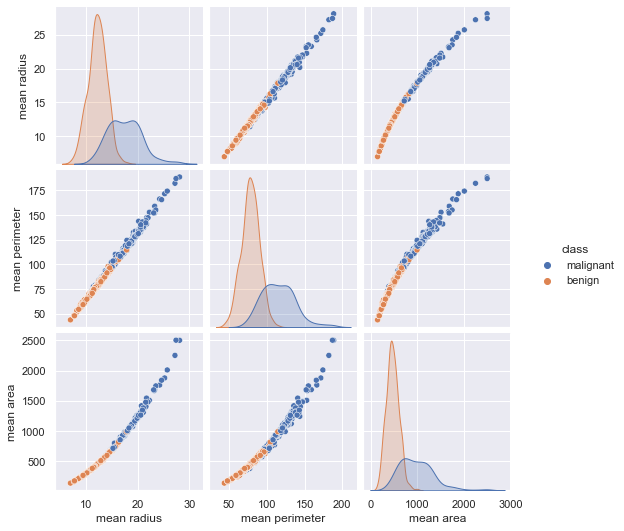

In [17]:
sns.pairplot(data=data[['mean radius', 'mean perimeter', 'mean area', 'class']], hue='class')

# Preprocessing

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [19]:
def preprocessing(df):
    """
    Application de l'APC pour decorreler les données et reduire les dimensions des variables.
    
    """
    X = df.iloc[:, :-1]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    pca = PCA(n_components=0.98)
    X_pca = pca.fit_transform(X_scaled)
    
    df_cancer = pd.DataFrame(data= X_pca, columns=['C' + str(i) for i in range(1, X_pca.shape[1] + 1)])
    df_cancer['class'] = data['class'].map({'malignant':0, 'benign':1})
    
    y = df_cancer['class']
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
    
    print("Train set : \n{}\n--------------------------".format(y_train.value_counts()))
    print("Test set : \n{}".format(y_test.value_counts()))
    
    return df_cancer, X_train, X_test, y_train, y_test
    

In [20]:
df_cancer, X_train, X_test, y_train, y_test = preprocessing(data)

Train set : 
1    286
0    169
Name: class, dtype: int64
--------------------------
Test set : 
1    71
0    43
Name: class, dtype: int64


# Modelisation

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix, classification_report

In [22]:
def evaluation(model, X_train, X_test, y_train, y_test, model_name='model'):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=4)
    
    print('\n\n\t\t\t==================== ' + model_name + ' =====================\n\n')
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    plt.figure()
    plt.title(model_name)
    plt.plot(N, train_score.mean(axis=1), label='Train')
    plt.plot(N, val_score.mean(axis=1), label='Validation')
    plt.legend()

In [23]:
nb = GaussianNB()
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42)

In [24]:
models = {'Naive_Bayes':nb,
          'KNN':knn,
          'Random_Forest':rf,
          'SVM':svm}



			==================== Naive_Bayes =====================


[[37  6]
 [ 1 70]]
              precision    recall  f1-score   support

           0       0.97      0.86      0.91        43
           1       0.92      0.99      0.95        71

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



			==================== KNN =====================


[[40  3]
 [ 3 68]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



			==================== Random_Forest =====================


[[41  2]
 [ 2 69]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        43


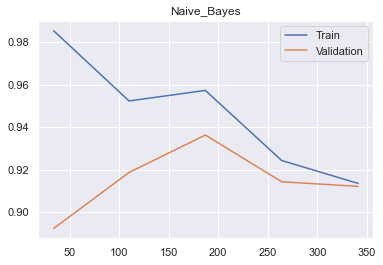

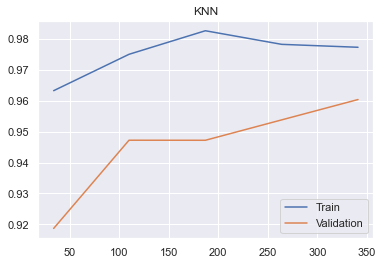

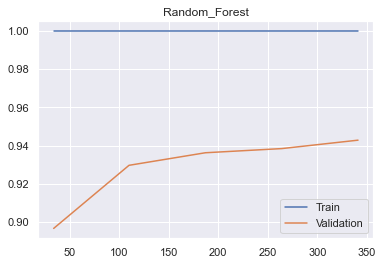

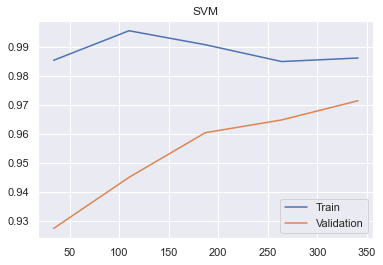

In [25]:
for name, model in models.items():
    
    evaluation(model, X_train, X_test, y_train, y_test, model_name=name)

# Optimisation

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
params =  {'gamma':['scale', 'auto'],
           'tol':np.linspace(0.0001, 0.001, 3),
           'C':np.arange(5)
          }

In [28]:
grid = GridSearchCV(SVC(random_state=42), param_grid=params, cv=4)

In [29]:
grid.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=SVC(random_state=42),
             param_grid={'C': array([0, 1, 2, 3, 4]),
                         'gamma': ['scale', 'auto'],
                         'tol': array([0.0001 , 0.00055, 0.001  ])})

In [30]:
grid.best_score_

0.9713747865238317

In [31]:
grid.best_params_

{'C': 1, 'gamma': 'scale', 'tol': 0.0001}

In [32]:
model = grid.best_estimator_



			==================== SVM =====================


[[41  2]
 [ 0 71]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



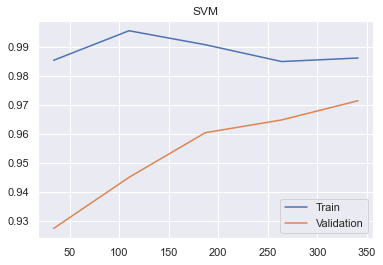

In [33]:
evaluation(model, X_train, X_test, y_train, y_test, model_name='SVM')

- Optimisation n'apporte aucune amelioration. 

In [34]:
ypred = model.predict(X_test)

In [35]:
confusion_matrix(y_test, ypred)

array([[41,  2],
       [ 0, 71]], dtype=int64)

<AxesSubplot:>

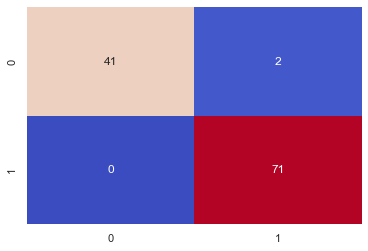

In [36]:
sns.heatmap(pd.DataFrame(data=confusion_matrix(y_test, ypred)), cbar=False, annot=True, cmap='coolwarm')

- **95%** des cancers malignes sont classés **malignes**. 
- Tous les cancers benignes sont classés **benignes**. 